# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

## Loading the dataset

In [ ]:
# Giving colab access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset that will be used to train and validate different models
data = pd.read_csv('/content/drive/MyDrive/Curso_DA/stock_data.csv')

## Data Overview

In [ ]:
# Having a glimpse of the data
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# Checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns in the data.")

There are 340 rows and 15 columns in the data.


In [ ]:
# Checking the type of data and null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* We have 11 numerical type, and 4 object type columns.
* We don't have missing values.

In [ ]:
# Droping 'Security' column 
data.drop("Security", axis=1, inplace=True)

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

* There are no duplicates in the data

In [ ]:
# Rechecking for missing values
data.isnull().sum()


Ticker Symbol                   0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* We don't see missing values.

In [ ]:
# Having a statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


* There seems to be big differences in scale between variables.

## Exploratory Data Analysis (EDA)

In [ ]:
# This function creates two subplots: a boxplot and a histogram plot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# This function creates labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

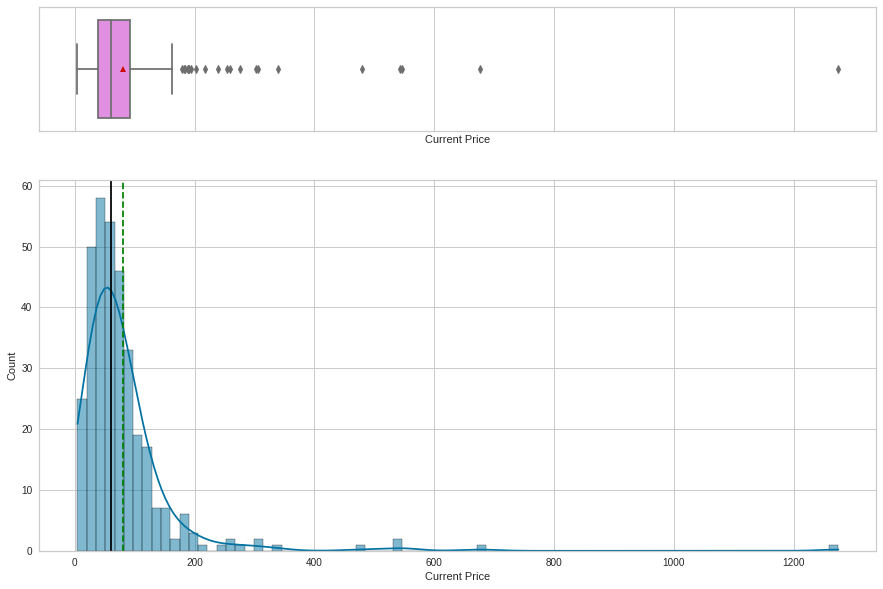

In [ ]:
# Visualizing Current Price
histogram_boxplot(data, 'Current Price', figsize=(15, 10), kde=False, bins=None)

* This variable has a right-skewed distribution, with a mean value of ~80 USD. 
* There are several outliers, but one is exceptionally high: 1274 USD.

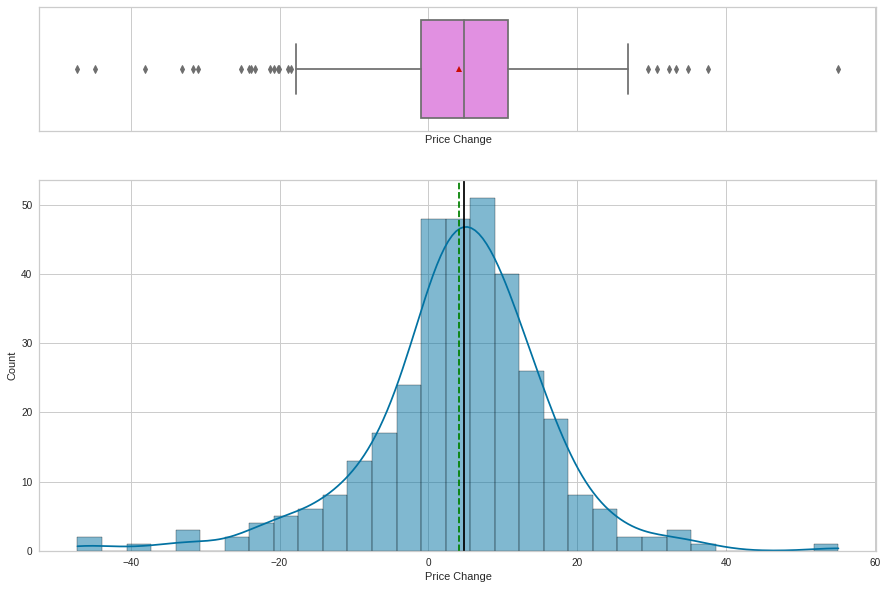

In [ ]:
# Visualizing Price Change
histogram_boxplot(data, 'Price Change', figsize=(15, 10), kde=False, bins=None)

* Price Chance column has a normal distribution. 
* Almost 75% of the stocks in the data set rose their price in 13 weeks. 

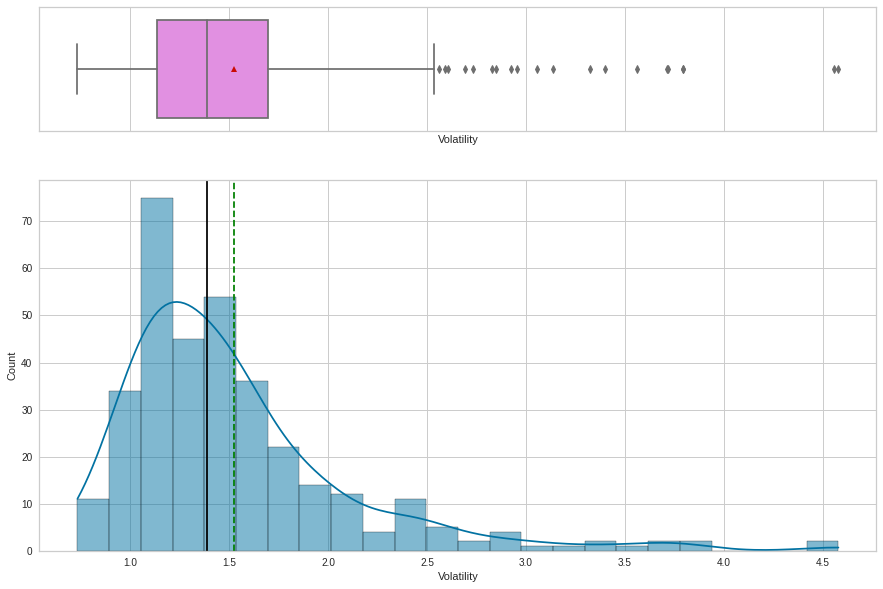

In [ ]:
# Visualizing Volatility
histogram_boxplot(data, 'Volatility', figsize=(15, 10), kde=False, bins=None)

* This variable's distribution is right skewed. 
* Most shares did not exceed a standard deviation of 2.5 in price.
* Some outliers had deviations of up to 4.5.

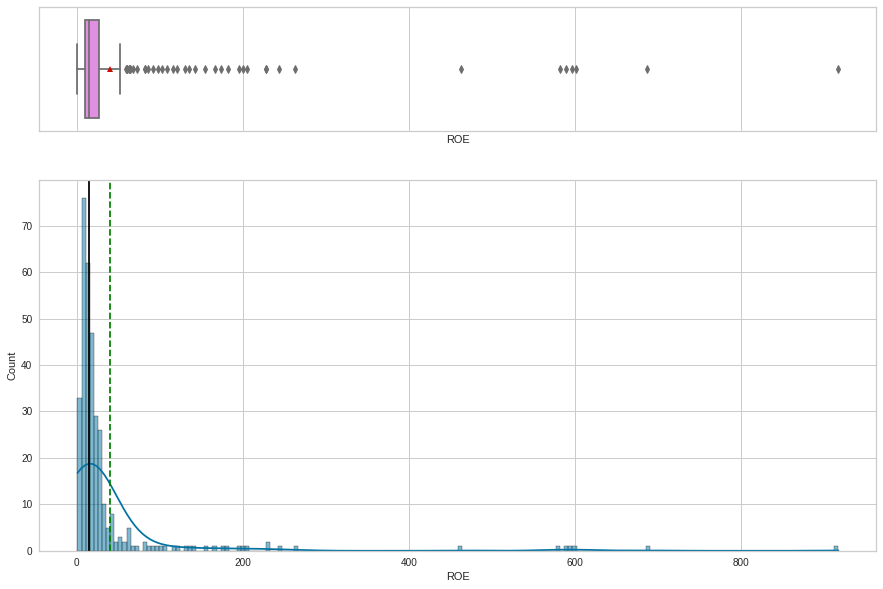

In [ ]:
# Visualizing ROE measure
histogram_boxplot(data, 'ROE', figsize=(15, 10), kde=False, bins=None)

*  This variable is very right-skewed. 
* The mean ROE is ~4. Nevertheless, we see a lot of companies overperforming this average.
* These companies show an outstanding relationship between net income and shareholders' equity.

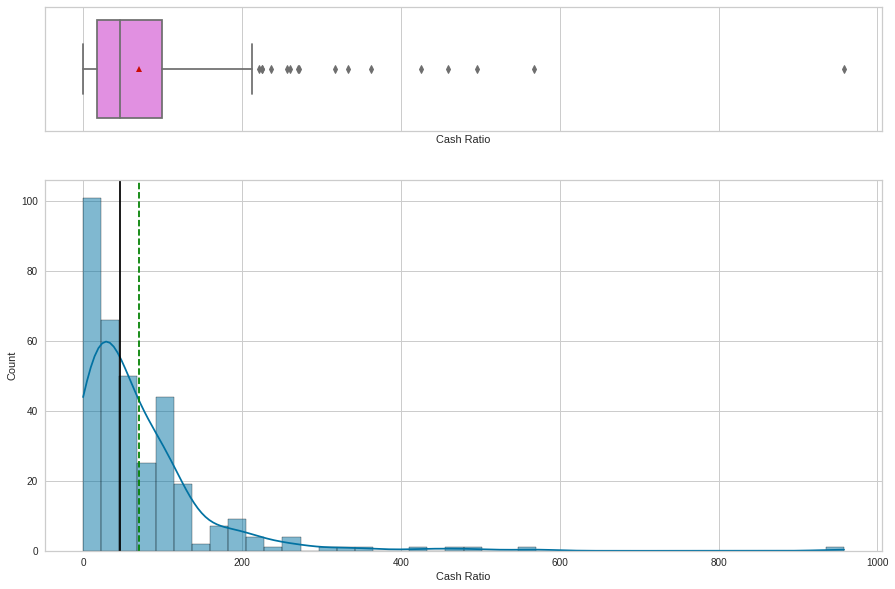

In [ ]:
# Visualizing Cash Ratio
histogram_boxplot(data, 'Cash Ratio', figsize=(15, 10), kde=False, bins=None)

*  We can see a trend where a voluminous group of companies maintains similar margins, and some outliers significantly raise the scale.
* In this case, there are many companies whose ratio of income to liabilities remains close to one to one. However, there are other companies whose cash ratio is around 200, 400, or even almost 1000.

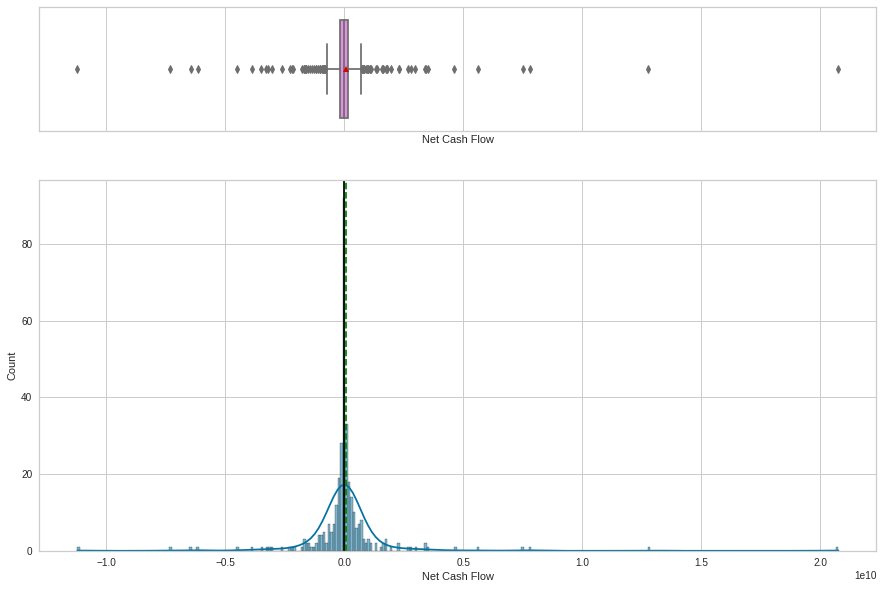

In [ ]:
# Visualizing Net Cash Flow
histogram_boxplot(data, 'Net Cash Flow', figsize=(15, 10), kde=False, bins=None)

* This variable has a reasonably normal distribution.
* Most companies maintain a balanced relationship, or very close to balanced, between cash in and cash out.
* The variable shows long tails on the left and right but is slightly right-skewed.

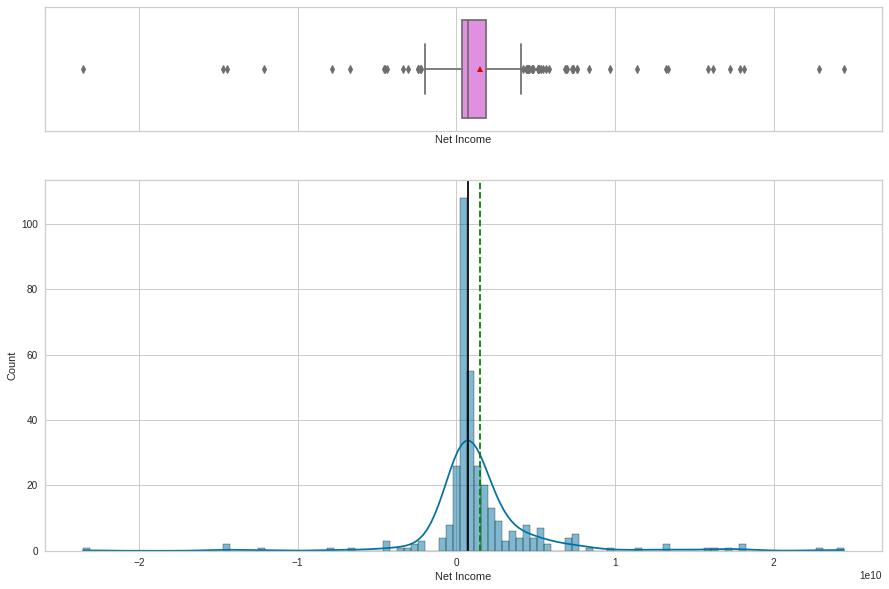

In [ ]:
# Visualizing Net Income
histogram_boxplot(data, 'Net Income', figsize=(15, 10), kde=False, bins=None)

* This column also shows a normal distribution, with most companies maintaining a positive relationship between revenue, expenses, interest, and taxes.
* We can see long tails on both sides of the median. 

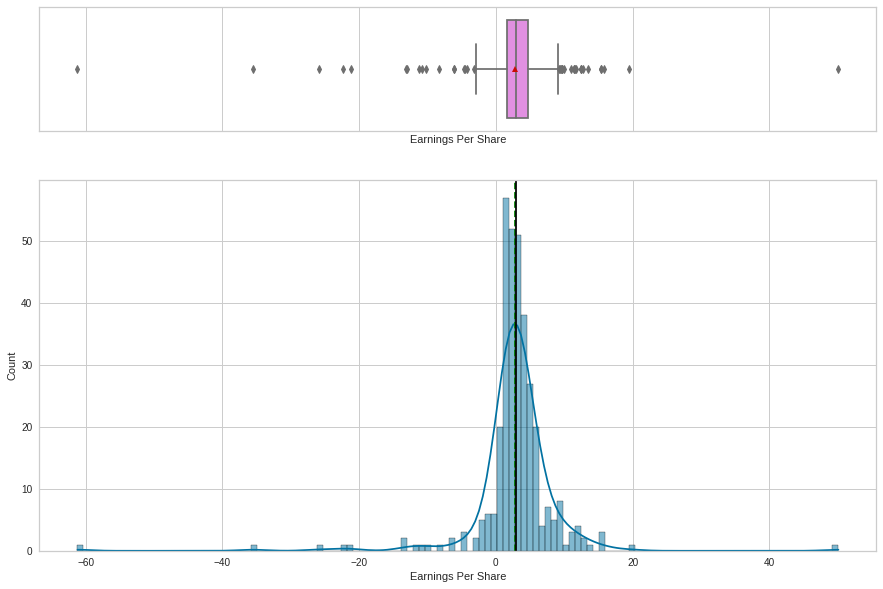

In [ ]:
# Visualizing Earnings Per Share
histogram_boxplot(data, 'Earnings Per Share', figsize=(15, 10), kde=False, bins=None)

* Earnings Per Share shows a normal distribution, with a positive balance for most companies.
* In this case, the variable has a left-skewed distribution.
* The outlier values on each side of the distribution are abnormally far from the mean. 

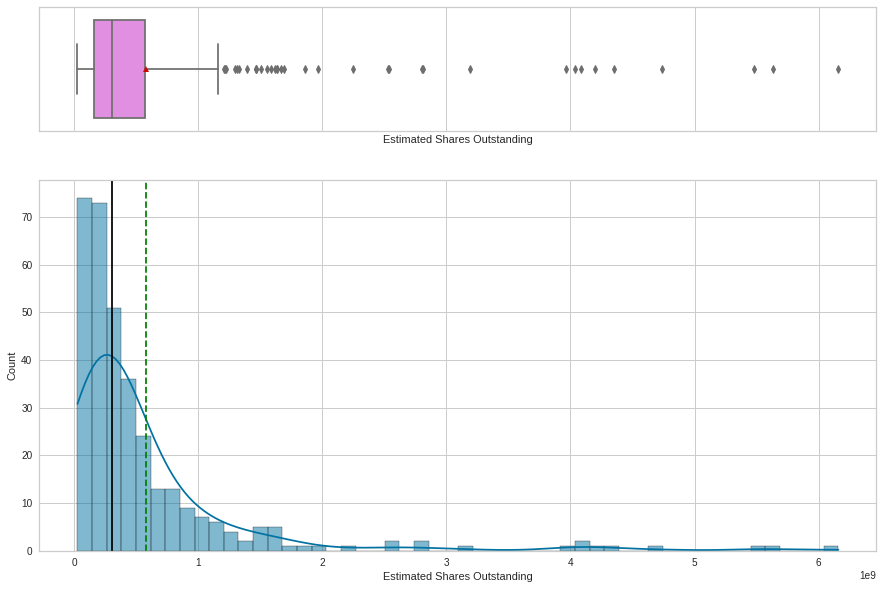

In [ ]:
# Visualizing Estimated Shares Outstanding
histogram_boxplot(data, 'Estimated Shares Outstanding', figsize=(15, 10), kde=False, bins=None)

* The variable is very right-skewed, with most companies' values for outstanding shares between 0 and 1.
* As is usual with other variables with this distribution shape, some companies show very abnormal values, even higher than 6.

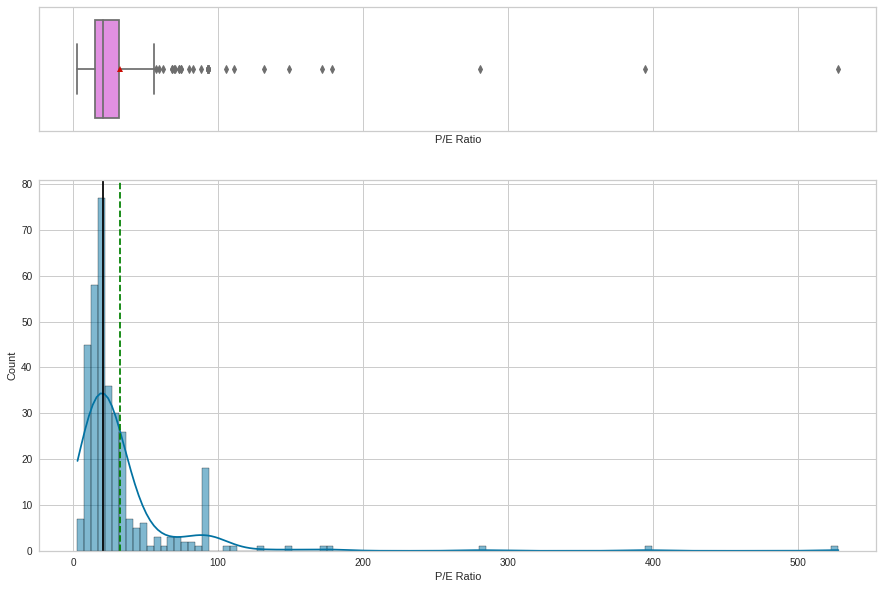

In [ ]:
# Visualizing P/E Ratio
histogram_boxplot(data, 'P/E Ratio', figsize=(15, 10), kde=False, bins=None)

* The companies' current stock price ratio to their earnings per share is usually lower than 100. 
* Some companies' stocks show outstanding performance, with P/E ratios of nearly 300, 400, or even higher than 500. 

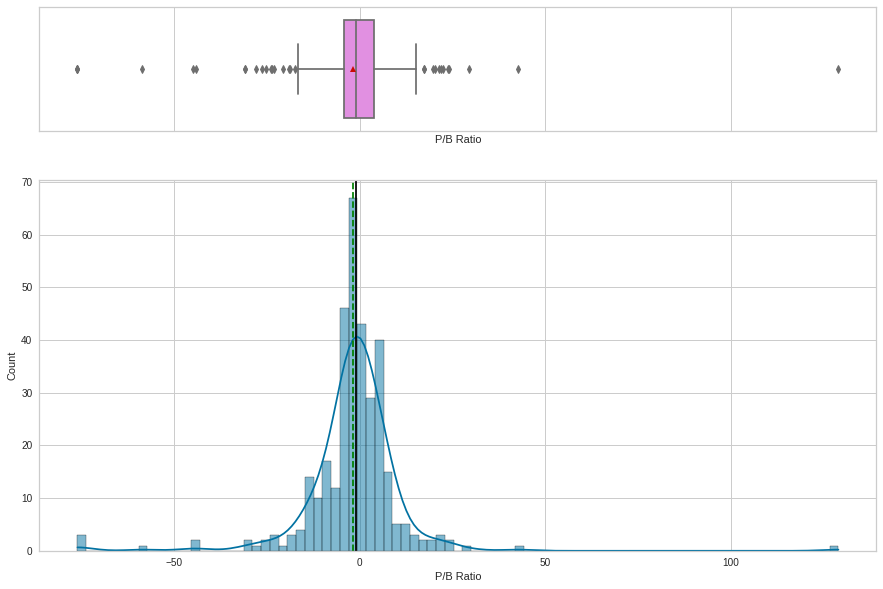

In [ ]:
# Visualizing P/B Ratio
histogram_boxplot(data, 'P/B Ratio', figsize=(15, 10), kde=False, bins=None)

* P/B Ratio has a normal distribution, with most companies performing in a -50 and 50 range. 

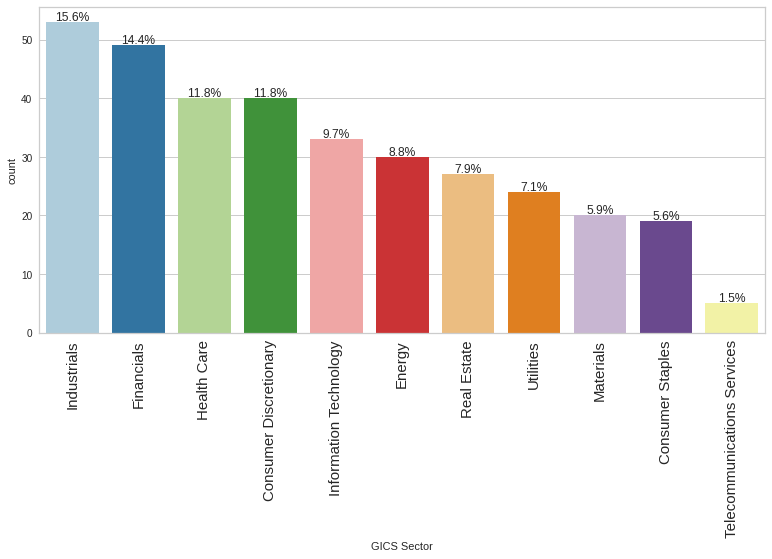

In [ ]:
# Visualizing GICS Sector
labeled_barplot(data, 'GICS Sector', perc=True, n=None)

* The data set is relatively well distributed among 11 sectors.
* Industrials (~ 16%), Financials (~ 14%), Health Care (~ 12%), and Consumer Discretionary (~12%) are the most common, even though they are represented in low double digits. 
* The telecommunications sector has the lowest representation of companies in the data set (1,5%).


### Bivariate analysis

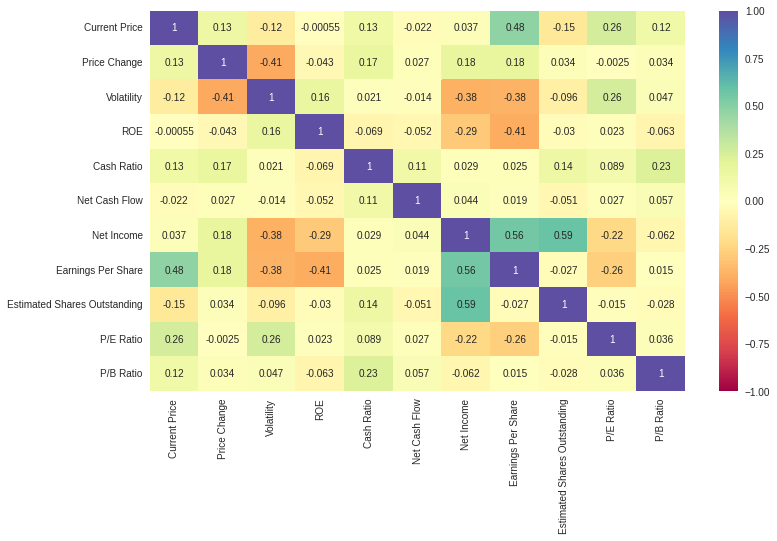

In [ ]:
# Visualizing correlations in the data
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, annot_kws={'fontsize':10}, cmap="Spectral")
plt.show()

* We can see positive correlations between Earnings Per Share and Net Income; and Estimated Shares Outstanding and Net Income.
* We see negative correlations between Earnings Per Share and ROE, Earnings Per Share and Volatility, and Net Income and Volatility. 

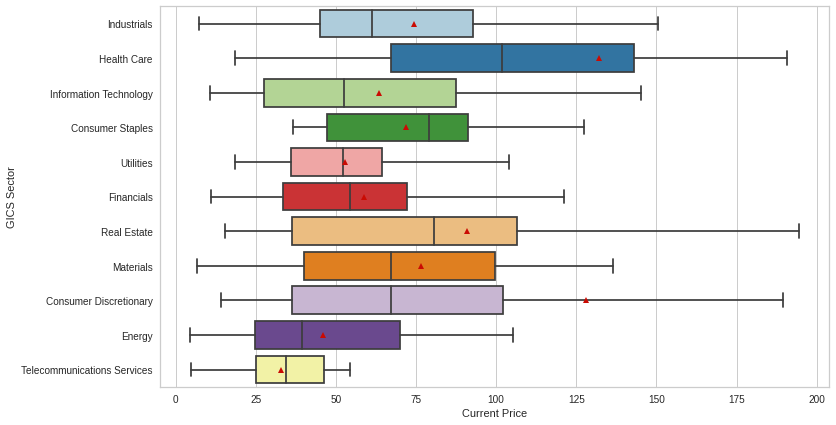

In [ ]:
# Visualizing Current Price by sector
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Current Price', y='GICS Sector', palette="Paired", showmeans=True, showfliers=False)
plt.show()

* Stocks in the health care sector have the highest average price, followed by Consumer Discretionary.



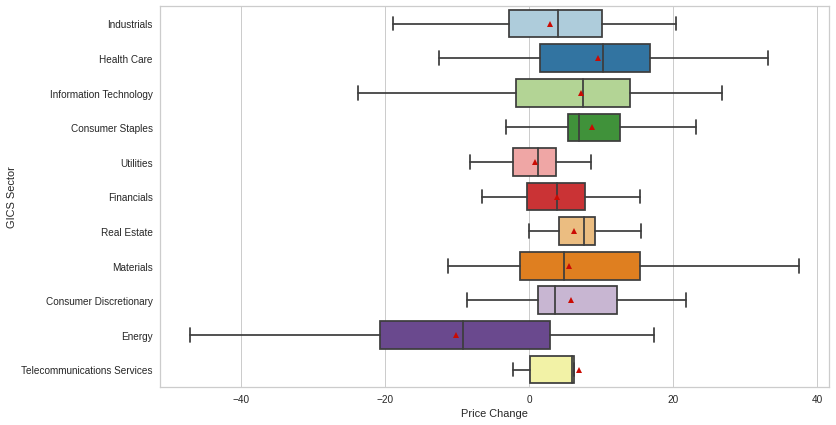

In [ ]:
# Visualizing Price Change by sector
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Price Change', y='GICS Sector', palette="Paired", showmeans=True, showfliers=False)
plt.show()

* Stocks in the Health Care sector also rose the most on average, followed by Consumer Staples.
* The Energy sector was the only one to experience a substantial decline on average.



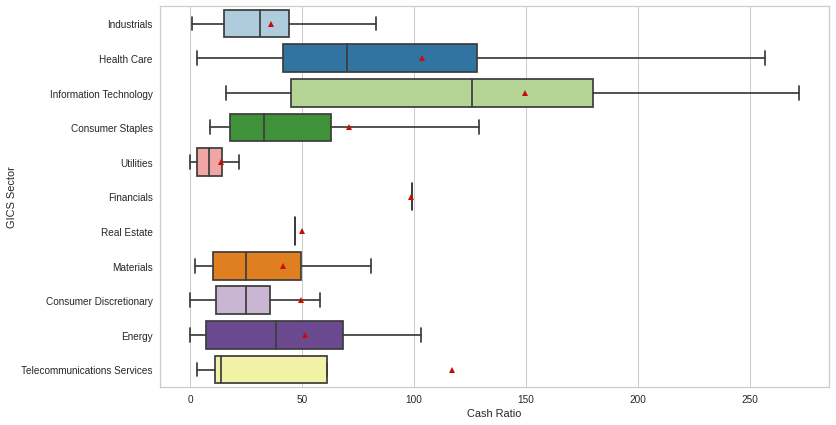

In [ ]:
# Visualizing Cash Ratio by sector
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Cash Ratio', y='GICS Sector', palette="Paired", showmeans=True, showfliers=False)
plt.show()

* The Information Technology sector is better able to cover its short-term obligations, followed by the Health Care Sector.
* The Utilities sector is the worst performer by the Cash Ratio metric. 

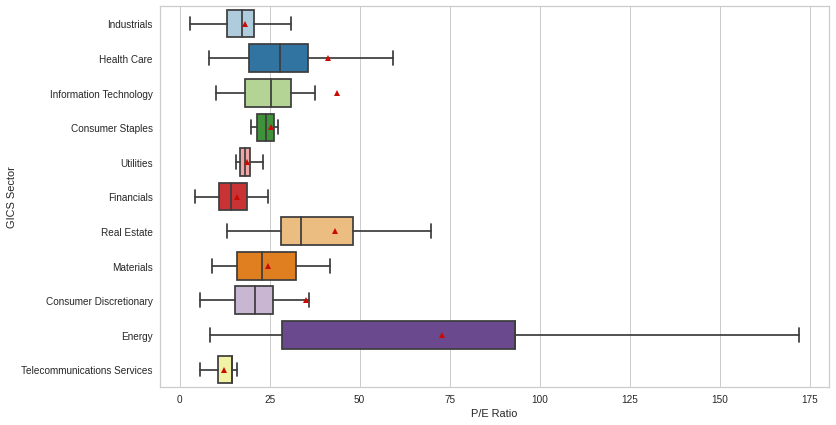

In [ ]:
# Visualizing P/E Ratios by sector
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='P/E Ratio', y='GICS Sector', palette="Paired", showmeans=True, showfliers=False)
plt.show()

* Although the Energy sector showed the worst share price changes, the P/E ratio shows they have the best average relative value.
* Information Technology and Health Care far follow this sector.

### Data preprocessing

In [ ]:
# Grouping numeric variables
num_cols = ['Current Price', 
            'Price Change', 
            'Volatility', 
            'ROE', 
            'Cash Ratio', 
            'Net Cash Flow', 
            'Net Income', 
            'Earnings Per Share', 
            'Estimated Shares Outstanding', 
            'P/E Ratio', 
            'P/B Ratio']

### Outlier detection and treatment

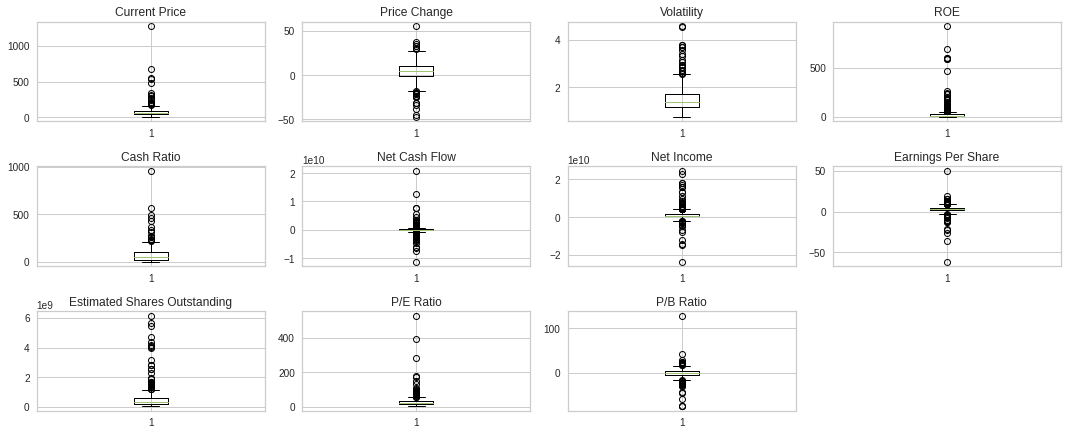

In [ ]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* As we can see from the univariate analysis, these features have sharp peaks and long tails.
* We don't have evidence pointing to these outliers as abnormal values.



### Scaling the data

In [ ]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = data[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.384499097487295
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.178151429073042
Number of Clusters: 5 	Average Distortion: 2.1182545080698882
Number of Clusters: 6 	Average Distortion: 2.080868227859732
Number of Clusters: 7 	Average Distortion: 2.011292727471867
Number of Clusters: 8 	Average Distortion: 1.9710223577205979
Number of Clusters: 9 	Average Distortion: 1.934677224987321
Number of Clusters: 10 	Average Distortion: 1.848901075684617
Number of Clusters: 11 	Average Distortion: 1.8124490290813269
Number of Clusters: 12 	Average Distortion: 1.7600263241222565
Number of Clusters: 13 	Average Distortion: 1.749703141132923
Number of Clusters: 14 	Average Distortion: 1.6982085078779934


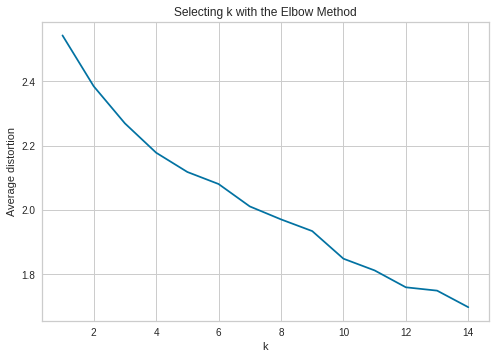

In [ ]:
# Loop to calculate average distortion from 1 to 8 clusters
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# Visualizing the average distortion
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

* The line appears to flatten a little after 3.
* Let's keep digging through Silhouette scores.

### **Silhouette scores**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.45755884975007327)
For n_clusters = 4, the silhouette score is 0.44894139600031724)
For n_clusters = 5, the silhouette score is 0.4314106887964818)
For n_clusters = 6, the silhouette score is 0.41439237473055257)
For n_clusters = 7, the silhouette score is 0.3929887629804409)
For n_clusters = 8, the silhouette score is 0.4125308916419519)
For n_clusters = 9, the silhouette score is 0.39348578575593063)
For n_clusters = 10, the silhouette score is 0.15153030906932635)
For n_clusters = 11, the silhouette score is 0.17047215569698043)
For n_clusters = 12, the silhouette score is 0.12260948117188304)
For n_clusters = 13, the silhouette score is 0.1369402493170304)
For n_clusters = 14, the silhouette score is 0.14213916526125772)


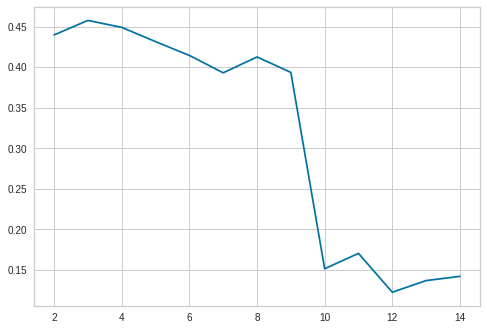

In [ ]:
# to calculate the silhouette scores
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# to visualize the silhouette scores
plt.plot(cluster_list, sil_score)
plt.show()

* Silhouette score is also higher in 3.
* 4 also looks promising. Let's visualize the silhouette in both.

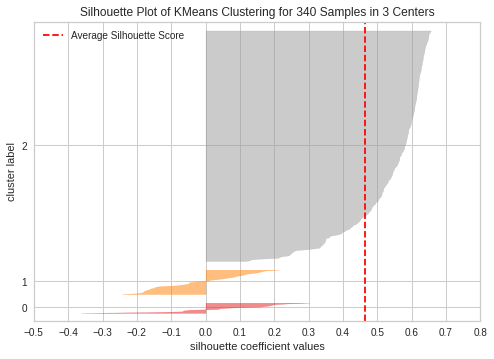

In [ ]:
# finding optimal no. of clusters with silhouette coefficients for 3 clusters
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

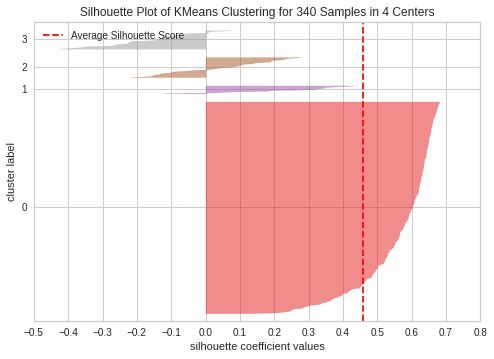

In [ ]:
# finding optimal no. of clusters with silhouette coefficients for 4 clusters
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

* Our clusters look heavily imbalanced. 
* Clusters 1, 2, and 3 fall short of the average score in the 4-cluster silhouette visualization, which shows these clusters are less cohesive. 
* Even though this visualization looks better than one with  3 clusters.
* Let's create our model with 4 clusters. 

### Creating our K-Means model

In [ ]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

### Cluster profiling

In [ ]:
# grouping the data set by average values in K_means_segments
cluster_profile = data.groupby("K_means_segments").mean()

In [ ]:
# adding a column for count in each segment
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")["Current Price"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


* Cluster '0' has the higher Current Price, Price Change, Cash Ratio, Net Cash Flow, Earnings Per Share, and P/B Ratio. It groups only 25 observations. 
* Cluster '1' has the higher Volatility, ROE, and P/E Ratio. It groups 27 observations. 
* Cluster '2' has the higher net income and estimated shares outstanding. It has  11 observations.
* Cluster '3' is the biggest: 277 observations. It doesn't show any outstanding value. 

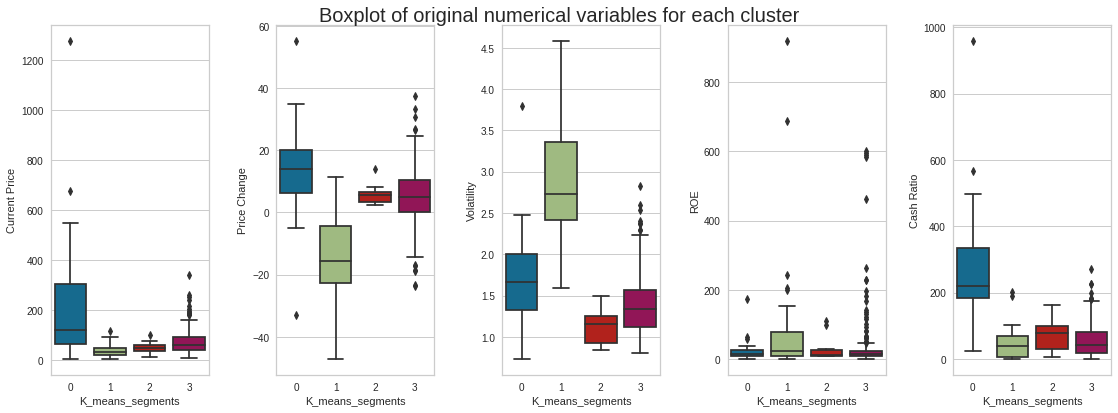

In [ ]:
# Visualizing how each cluster looks for each feature (original scale)
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_cols[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

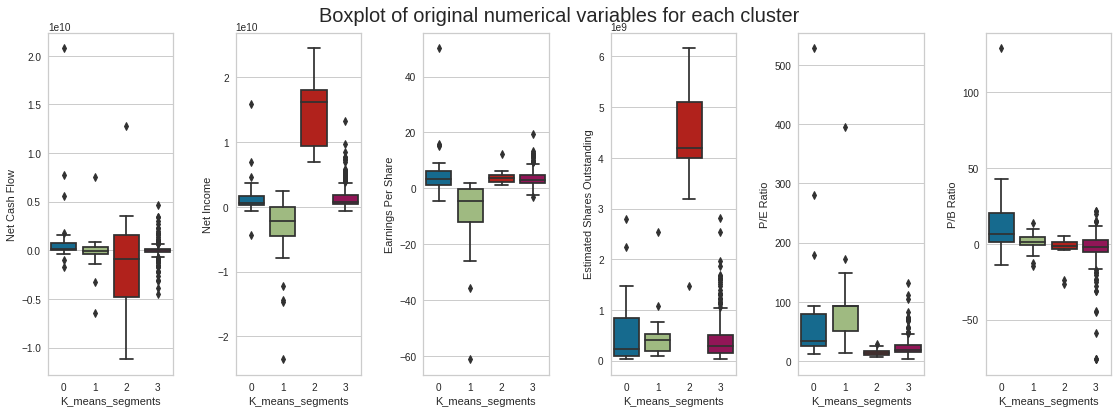

In [ ]:
# Visualizing how each cluster looks for each feature (original scale)
fig, axes = plt.subplots(1, 6, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 5
for ii in range(6):
    sns.boxplot(ax=axes[ii], y=data[num_cols[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### K-Means Clustering observations

* K-Means Clustering allowed us to single out top-performer stocks.
* In cluster '0', we have expensive stocks with a significant price change in the last 13 weeks. These 25 companies have the highest cash reserves and cash flows. Each share of these companies shows the highest earnings and P/B ratio. We can call this cluster 'Gourmet Group'. 
* We can find higher stock price volatility for cluster '1' companies. They are also the top ROE metric performers and have the highest P/E ratio. The cluster size is 27. We'll call this 'Adrenaline Group'.
* Cluster '2' groups 11 companies with the highest net income and the most considerable amount of shares outstanding. This will be the 'Steady Hand Group'.
*  Cluster '3' groups 277 companies. Our model is heavily imbalanced. More than 80% of the observations got grouped in this cluster with no distinctive features. 
* Our model would succeed in categorizing top-performer stocks, but we will need another approach to capture more granularity for most of the data set.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9304469769832865.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8559480642212798.
Cophenetic correlation for Euclidean distance and average linkage is 0.946403836884538.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7508819056084053.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9161627445317929.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.822502094153258.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9379218754329659.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9153206618543516.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9348505176633238.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6881861661402056.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9360657692078034.
Cophenetic corr

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.946403836884538, which is obtained with Euclidean distance and average linkage.


In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

#to comprehensively check Cophenetic correlations with Euclidean distance
for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9304469769832865.
Cophenetic correlation for complete linkage is 0.8559480642212798.
Cophenetic correlation for average linkage is 0.946403836884538.
Cophenetic correlation for centroid linkage is 0.9494262703881242.
Cophenetic correlation for ward linkage is 0.7436374975239648.
Cophenetic correlation for weighted linkage is 0.7508819056084053.


### Checking Dendograms

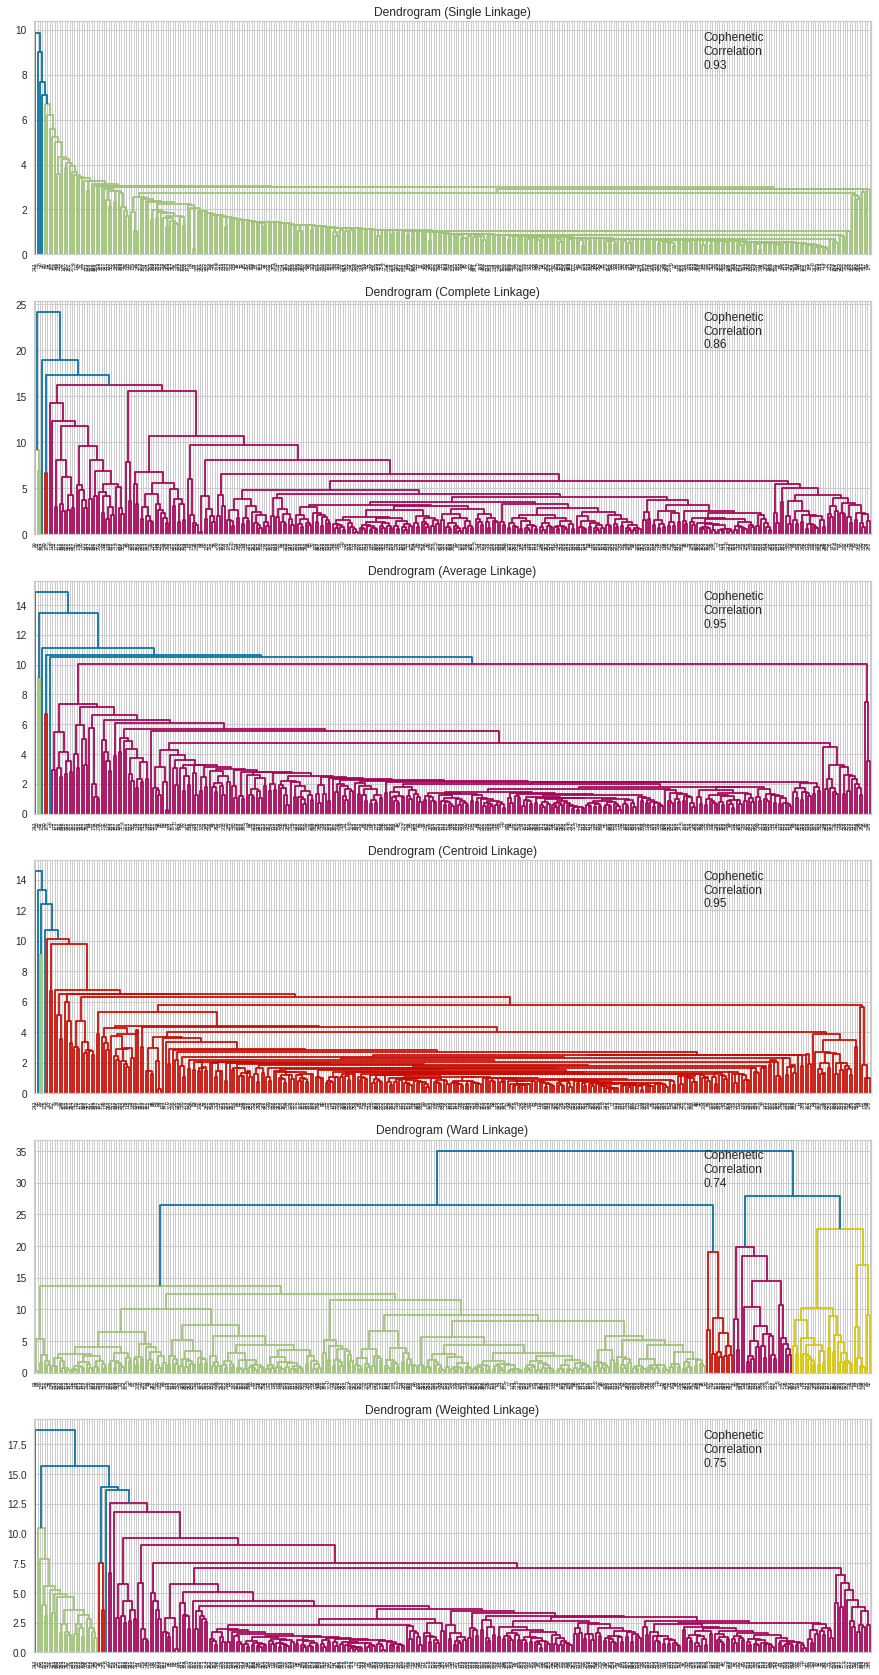

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.930447
1,complete,0.855948
2,average,0.946404
3,centroid,0.949426
4,ward,0.743637
5,weighted,0.750882


* The average and the centroid linking methods are the best performers. 
* Ward method gives us the most distinct and spread clusters, even though it has the lowest Cophenetic coefficient. 

Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).

0.013195437999968362


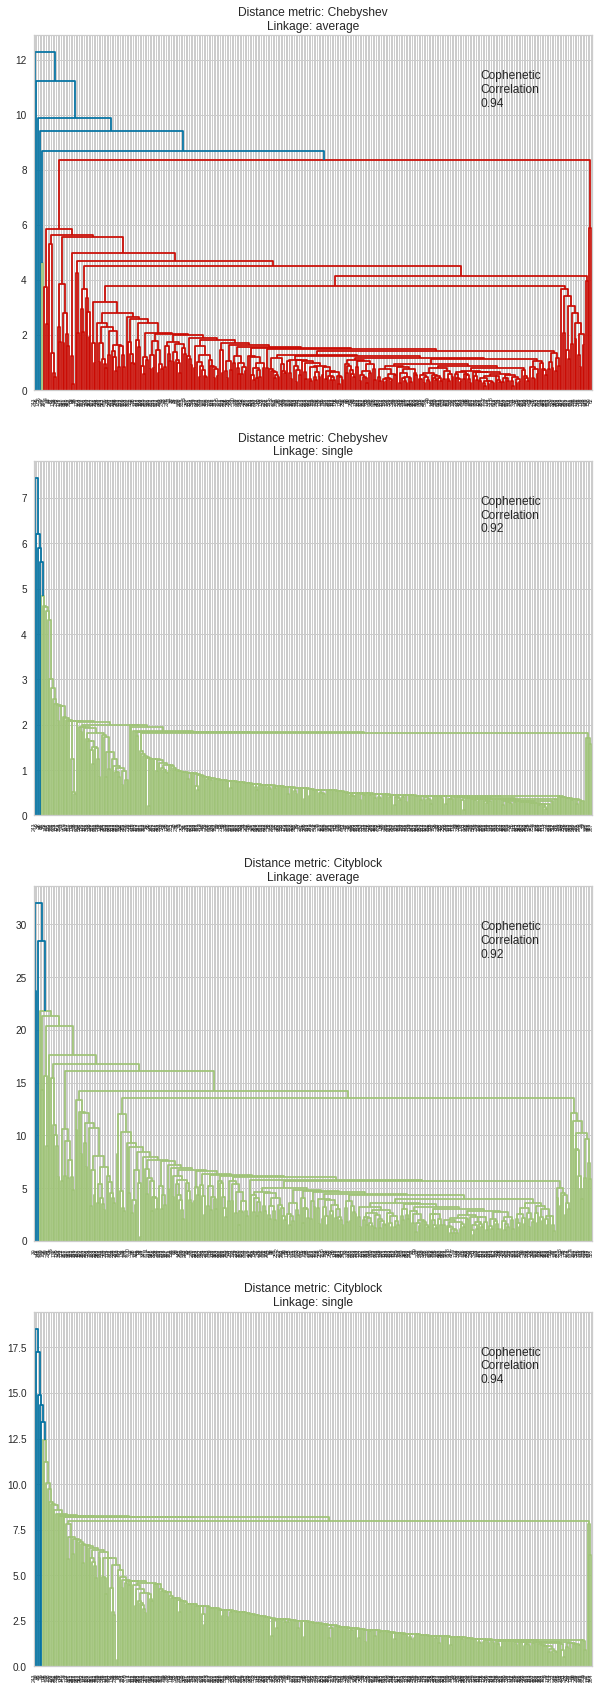

In [ ]:
# list of distance metrics
distance_metrics = ["chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "single"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

start = timeit.timeit()

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1
end = timeit.timeit()
print(end - start)

**Observations**

* Even though Chevyshev, with the average method, and Manhattan, with the single method, gave us a better Cophenetic correlation, their dendrograms looked like crowded and indefinite clusters. 
* Out of all the dendrograms we saw, it is clear that the dendrogram with Euclidian distance and Ward linkage gave us separate and distinct clusters.
* We want to avoid an imbalanced model distribution, like the one we got with the K-Means model. We will work with 11 clusters. 

### Creating our Hierachical Model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
cluster_profile_HC = data.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile_HC["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Current Price"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,35.123704,-15.972085,2.886801,107.000000,54.629630,103174407.407407,-3916851851.851852,-9.513704,496193650.201482,79.459053,2.195624,0.962963,27
1,471.016994,9.266665,1.701100,16.900000,150.700000,238426500.000000,944577400.000000,11.722000,167785291.652000,152.618880,21.628219,0.100000,10
2,78.680834,17.039561,1.756539,30.750000,342.000000,2634101312.500000,2630197437.500000,2.337500,1068261073.787500,41.465680,7.793003,0.125000,16
3,104.532500,4.526535,1.519539,244.750000,38.166667,-85558416.666667,947863750.000000,3.469167,236133498.915000,25.638048,-37.196372,3.000000,12
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,2.000000,9
5,71.057722,5.081636,1.382797,25.379699,54.026316,-150763.157895,1568821304.511278,3.660771,451519303.311391,23.703821,-1.807942,2.996241,266


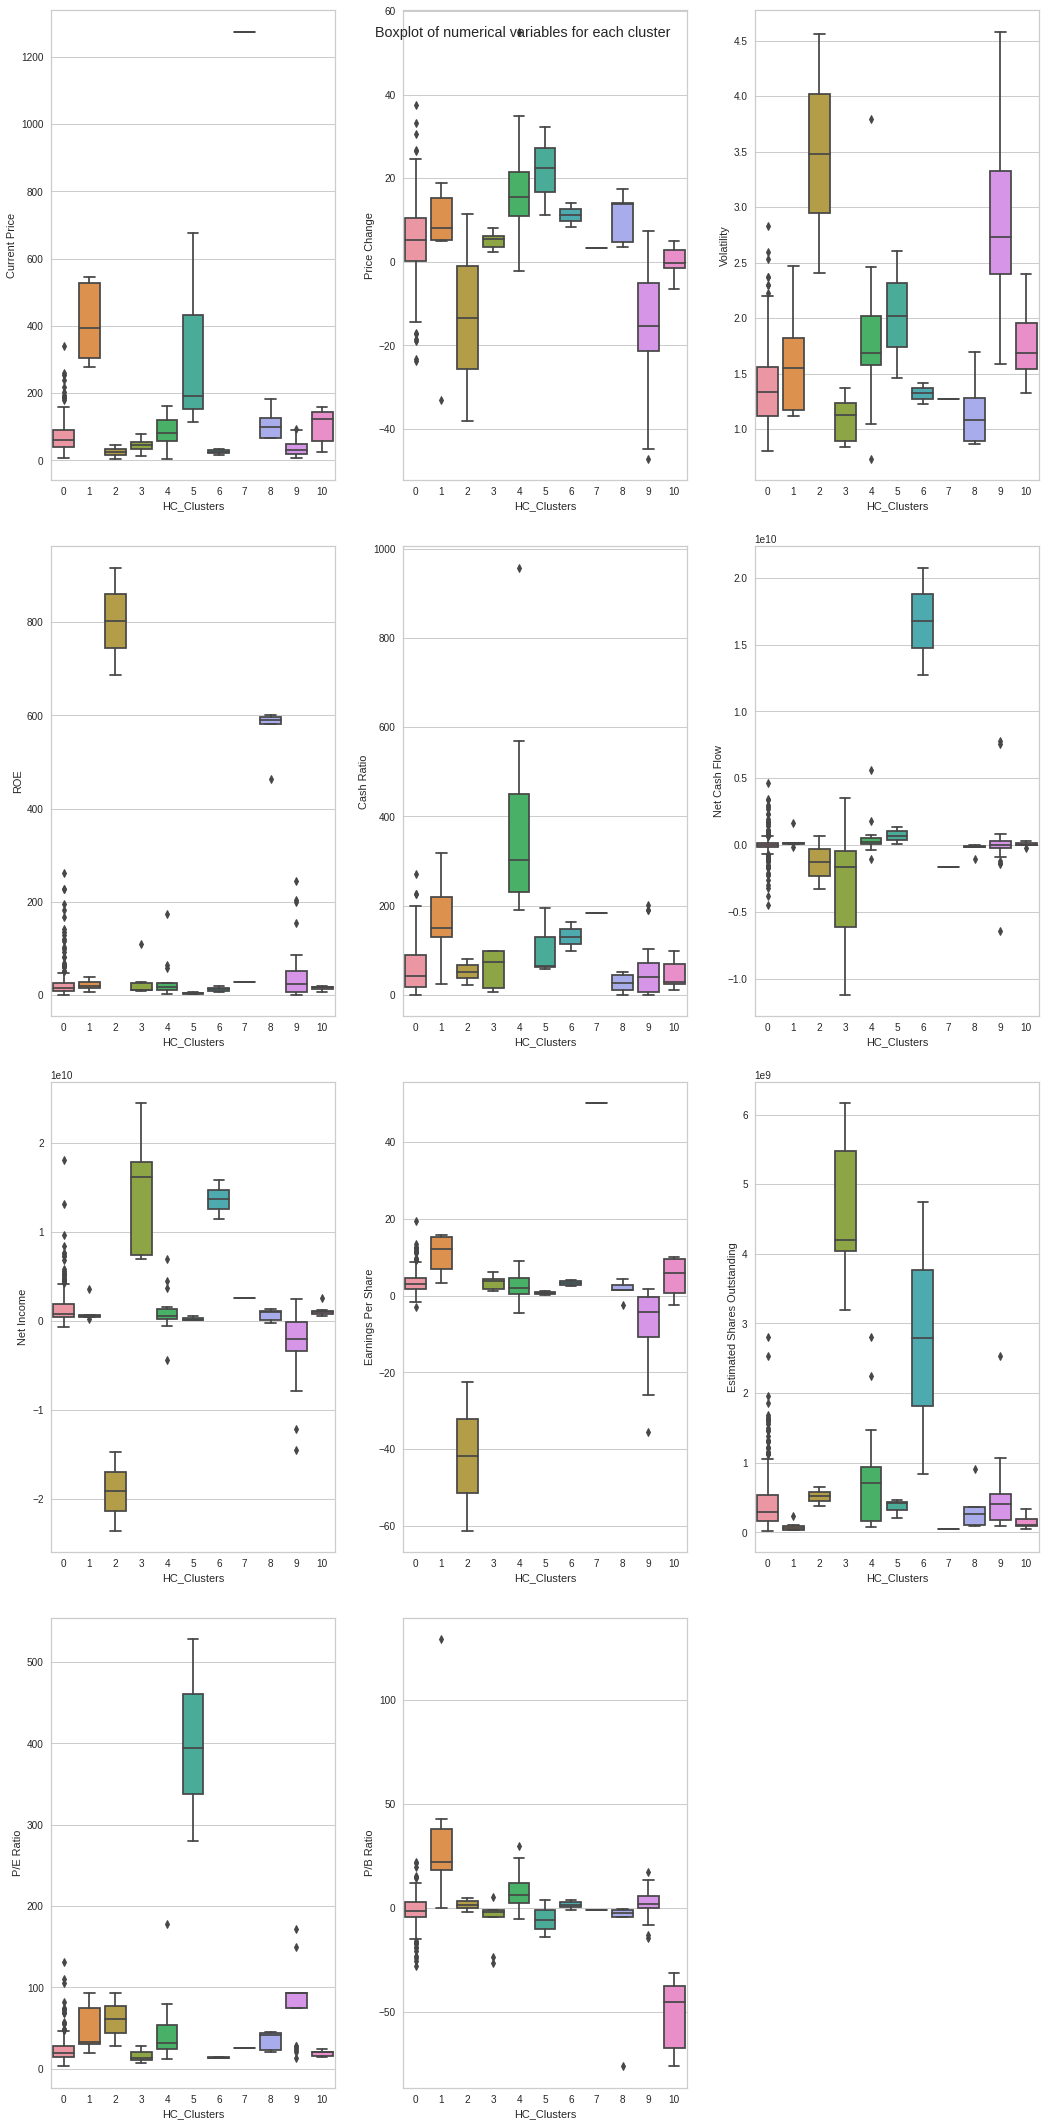

In [ ]:
plt.figure(figsize=(15, 30))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Hierarchical Clustering observations

* In cluster '0', we could identify the companies that showed the most significant volatility. In total, 27, mainly from the Adrenaline Group, from the K-Means model.
* In cluster '1', we mainly have shares from the Gourmet Group. They had the highest Current Price, Earnings Per Share, P/E Ratio, and P/B Ratio. There are 10 companies in this cluster.
* In cluster '2', we have stocks that performed best in Price Change, Cash Ratio, and Net Cash Flow. There are 16 companies, and they mostly appear in the Gourmet Group.
* Cluster '3' groups the stocks with the highest ROE. They are 12 and belonged to the Steady-Hand Group in the previous model.
* In cluster '4', we also have the companies located previously in the Steady-Hand Group, and with Hierarchical Clustering they scored better in Net Income and Estimated Shares Outstanding. There are 9 companies in this group.
* Cluster '5' has 266 companies and no outstanding features. We could only reduce the indeterminate group of the K-Means model in 11 companies.

## K-means vs Hierarchical Clustering

* The Hierarchical Clustering model gave us a little more granularity; however, it implies a more expensive process. The execution times for the calculation of the dendrograms were significantly greater than the time required to design the K-Means model.
* We identified that both models categorized their clusters under similar criteria. The groups of the K-Means model could be located in the Hierarchical Clustering model.
* Through Hierarchical Clustering, we could isolate those companies whose shares showed the most volatility.
* This model also helped us to more accurately identify the ten companies that showed the best performance in their shares, which were grouped in cluster '1'.
* We failed to obtain smaller groups from the big cluster with less prominent features.

## Actionable Insights and Recommendations

We have managed to build two clustering models:

  a) that Trade&Ahead can use to provide simple strategies to its clients to make complex financial decisions,

  b) that can be used as input for creating predictive models based on stock market segments.

Based on our analysis, we identified different stock clusters:

a) that offer the best return options based on several performance metrics,

b) that represent the riskiest investments due to their high price volatility,

c) or that offer the most stable and conservative options for investment.

If Trade&Ahead has adequate data processing capacity, we recommend using the Hierarchical Clustering model. This analysis tool allowed us to get a more diverse analysis. The main conclusions for its six clusters are: 
* In cluster '0', we could identify the companies that showed the most significant volatility. In total, 27.
* In cluster '1', we have shares with the highest Current Price, Earnings Per Share, P/E Ratio, and P/B Ratio. There are 10 companies in this cluster.
* In cluster '2', we have stocks that performed best in Price Change, Cash Ratio, and Net Cash Flow. There are 16 companies in this group.
* Cluster '3' groups the 12 companies with the highest ROE.
* In cluster '4', we have companies that scored better in Net Income and Estimated Shares Outstanding. There are 9 companies in this group.
* Cluster '5' has 266 companies and no outstanding features.

On the other hand, if the company has limited computing capabilities, we recommend using the K-Means model, which identifies top-performing companies with a more straightforward approach and only 4 clusters: Gourmet Group, Adrenaline Group, Steady-Hand Group, and the generic group.

We further recommend a follow-up analysis to identify subclusters within the larger cluster of companies that did not have outstanding characteristics.